Support Vector Machines (SVM)
------

<center><img src="images/support_svm.png" width="700"/></center>

Quick Review
-----

- Binary Classifers
- Train/Test split
- Bias-Variance trade-offs
- Regularizaiton
- Evaluation metrics

Using SVM to solve roommate issues
------
<center><img src="images/roommate.jpg" width="700"/></center>

When I was a student in SF I had to share a room with a roommate. 

It was huge room and our stuff was all over the floor. We too lazy to pick the stuff up. But we wanted privacy.

Our solution was to separate our stuff with a straight room divider.

We could the divider anywhere, we decided it was most fair to put in the middle of our stuff.

<center><img src="images/panel_divider.jpg" width="700"/></center>

By The End Of This Session You Should Be Able To:
----

- Understand the notion of decision boundaries
- Describe the function and parameters of SVMs
- Investigate how SVMs perform in terms of 
- Investigate some of the maths behind SVMs


Define SVM
-----

Scikit Demo
-------

In [57]:
reset -fs

In [58]:
from sklearn import svm

In [59]:
X = [[8, 8], 
     [25, 25]]
 
y = ['orange', 'basketball']

In [60]:
import matplotlib.pyplot as plt

%matplotlib inline

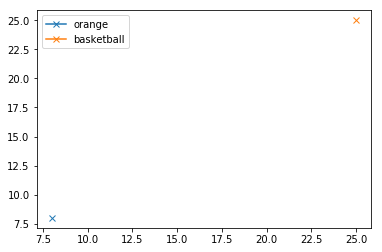

In [61]:
for i, row in enumerate(X):
    plt.plot(row[0], row[1], label=y[i], marker='x');
    
plt.legend();
plt.show();

In [62]:
# Define an instance of a SVM classifer
clf = svm.SVC()

In [63]:
# Estimate the classifer for our data
clf.fit(X, y);  

In [64]:
# After being fitted, the model can then be used to predict new values:

clf.predict([[2, 2]]).item()
# clf.predict([[30, 30]]).item()
# clf.predict([[16.0, 16.0]]).item()

'orange'

Check for understanding
-------

What are the support vectors in this example?

In [65]:
# Get support vectors
clf.support_vectors_

array([[25., 25.],
       [ 8.,  8.]])

Reference: http://scikit-learn.org/stable/modules/svm.html

Kernel Trick: The only weird thing that works for linear classifiers
-----

When should you use SVMs
-----

use small about the data
    + can handle class imbalances
    + can be extended for anonlymy dectetion
    + fast for prediction

When should you NOT use SVMs
-----

- Slow to train
- sensetive to regularization and kernel choices

Check for understanding
------

I want to build XX....

Summary
------

- 

Further Study
-----

- Dig into the math of SVM. [The Elements of Statistical Learning](http://www.springer.com/us/book/9780387848570)
- Write your own SVM classifer.
- Explore kernels. [Learning with Kernels: Support Vector Machines, Regularization, Optimization, and Beyond](https://www.amazon.com/Learning-Kernels-Regularization-Optimization-Computation/dp/0262194759)
- Hard vs. Soft margin

<br>
<br> 
<br>

----